In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.7
IPython version      : 7.18.1

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.28)
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Feb 15 2021 18:19:54CET



## Load of the data

In [3]:
from process import loaddata
regr_data = loaddata("../data/regression/250.csv")
class_data = loaddata("../data/classifier/250.csv")

In [4]:
np.random.shuffle(class_data)
y = class_data[:,0]
x = class_data[:,1:]

In [5]:
x.shape

(334438, 10)

In [6]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 250828 
Valuation sample: 83610


In [7]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [9]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16, activation = "sigmoid" , input_shape = x.shape))
    model.add (layers.Dense (16, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [10]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 20 , validation_data = (x_val, y_val) )
model.save("../models/classifier/no-dropout-250.h5")

Epoch 1/20
12542/12542 [==============================] - 12s 890us/step - loss: 0.4328 - accuracy: 0.8113 - val_loss: 0.2183 - val_accuracy: 0.9231
Epoch 2/20
12542/12542 [==============================] - 11s 872us/step - loss: 0.2008 - accuracy: 0.9315 - val_loss: 0.1778 - val_accuracy: 0.9416
Epoch 3/20
12542/12542 [==============================] - 13s 1ms/step - loss: 0.1799 - accuracy: 0.9413 - val_loss: 0.1758 - val_accuracy: 0.9436
Epoch 4/20
12542/12542 [==============================] - 17s 1ms/step - loss: 0.1753 - accuracy: 0.9437 - val_loss: 0.1648 - val_accuracy: 0.9492
Epoch 5/20
12542/12542 [==============================] - 15s 1ms/step - loss: 0.1722 - accuracy: 0.9448 - val_loss: 0.1733 - val_accuracy: 0.9433
Epoch 6/20
12542/12542 [==============================] - 15s 1ms/step - loss: 0.1691 - accuracy: 0.9464 - val_loss: 0.1653 - val_accuracy: 0.9488
Epoch 7/20
12542/12542 [==============================] - 15s 1ms/step - loss: 0.1686 - accuracy: 0.9472 - val_los

<ipython-input-16-5ff47e697a9f>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


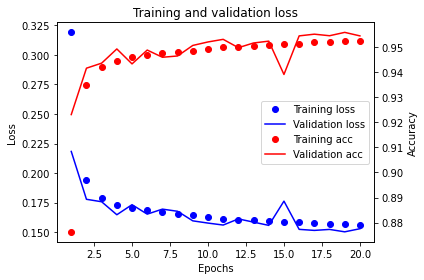

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('Accuracy')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss.pdf")
fig.show()

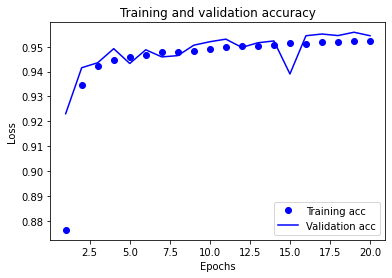

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (16, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [18]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 300 , validation_data = (x_val, y_val) )
model.save("../models/classifier/with-dropout-250.h5")

Epoch 1/20
837/837 [==============================] - 1s 1ms/step - loss: 0.5863 - accuracy: 0.6689 - val_loss: 0.2307 - val_accuracy: 0.9249
Epoch 2/20
837/837 [==============================] - 1s 1ms/step - loss: 0.2475 - accuracy: 0.9140 - val_loss: 0.1849 - val_accuracy: 0.9388
Epoch 3/20
837/837 [==============================] - 1s 1ms/step - loss: 0.2075 - accuracy: 0.9297 - val_loss: 0.1711 - val_accuracy: 0.9465
Epoch 4/20
837/837 [==============================] - 1s 1ms/step - loss: 0.1934 - accuracy: 0.9358 - val_loss: 0.1651 - val_accuracy: 0.9493
Epoch 5/20
837/837 [==============================] - 1s 1ms/step - loss: 0.1865 - accuracy: 0.9382 - val_loss: 0.1634 - val_accuracy: 0.9495
Epoch 6/20
837/837 [==============================] - 1s 1ms/step - loss: 0.1803 - accuracy: 0.9419 - val_loss: 0.1595 - val_accuracy: 0.9518
Epoch 7/20
837/837 [==============================] - 1s 1ms/step - loss: 0.1736 - accuracy: 0.9446 - val_loss: 0.1568 - val_accuracy: 0.9519
Epoch 

## Adding Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

##### [From Deep Learning with Python, Chollet]

<ipython-input-19-371c4d5f3f4d>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


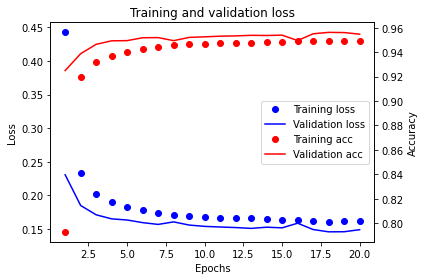

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('Accuracy')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss_drop.pdf")
fig.show()

In [ ]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()